<a href="https://colab.research.google.com/github/yaicianis/Face-Mask-Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset


In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:01<00:00, 116MB/s]
100% 163M/163M [00:01<00:00, 110MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
ls

data/  face-mask-dataset.zip  sample_data/


importing the dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3310.jpg', 'with_mask_2294.jpg', 'with_mask_2790.jpg', 'with_mask_1926.jpg', 'with_mask_1152.jpg']
['with_mask_1177.jpg', 'with_mask_1375.jpg', 'with_mask_2639.jpg', 'with_mask_1889.jpg', 'with_mask_2445.jpg']


In [8]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1419.jpg', 'without_mask_714.jpg', 'without_mask_2334.jpg', 'without_mask_1998.jpg', 'without_mask_2733.jpg']
['without_mask_1807.jpg', 'without_mask_644.jpg', 'without_mask_2945.jpg', 'without_mask_1214.jpg', 'without_mask_1604.jpg']


In [9]:
print('number of with mak images',len(with_mask_files))
print('number of without mak images',len(without_mask_files))


number of with mak images 3725
number of without mak images 3828


creating labels for the two class of images

with mask-->1

without mask-->0


In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


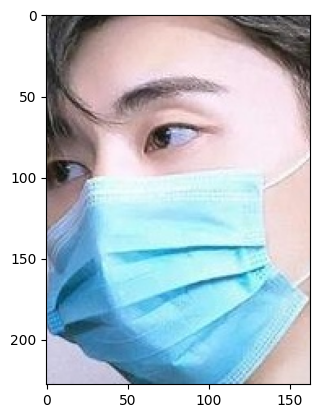

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

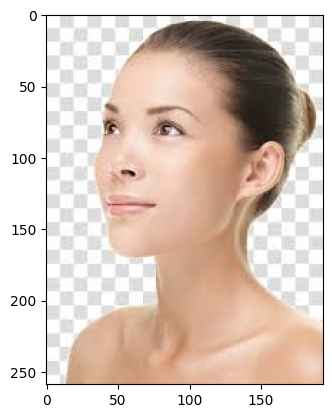

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

image preprocessing

resize image

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
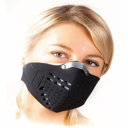

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
len(data)

7553

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
# converting image list and label list to numpy arrays

x=np.array(data)
y=np.array(labels)

In [24]:
type(x)

numpy.ndarray

In [25]:
type(y)

numpy.ndarray

In [26]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(y)

[1 1 1 ... 0 0 0]


train test split

In [28]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
# scaling the data

x_train_scaled=x_train/255
x_test_scaled=x_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [249, 249, 250],
        [252, 252, 252],
        [253, 253, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [234, 234, 235],
        [239, 239, 241],
        [240, 239, 242]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 99,  89, 103],
        [108,  98, 112],
        [109,  98, 112]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [125, 120, 126],
        [130, 125, 131],
        [134, 129, 135]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [246, 246, 246]]], dtype=uint8)
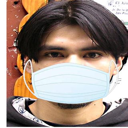

In [31]:
x_train[0]

In [32]:
x_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.97647059, 0.97647059, 0.98039216],
        [0.98823529, 0.98823529, 0.98823529],
        [0.99215686, 0.99215686, 0.99607843]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.91764706, 0.91764706, 0.92156863],
        [0.9372549 , 0.9372549 , 0.94509804],
        [0.94117647, 0.9372549 , 0.94901961]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

Building a convolutional Neural Networks (CNN)

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))



In [35]:
#compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [36]:
#training the neural network
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 23ms/step - loss: 0.4437 - acc: 0.8025 - val_loss: 0.3256 - val_acc: 0.8860
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2785 - acc: 0.8941 - val_loss: 0.2501 - val_acc: 0.8975
Epoch 3/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2224 - acc: 0.9183 - val_loss: 0.2064 - val_acc: 0.9207
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1844 - acc: 0.9283 - val_loss: 0.1773 - val_acc: 0.9223
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1736 - acc: 0.9367 - val_loss: 0.1714 - val_acc: 0.9289


model evaluation

In [37]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print('test accuracy :',accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2024 - acc: 0.9259
test accuracy : 0.9258769154548645


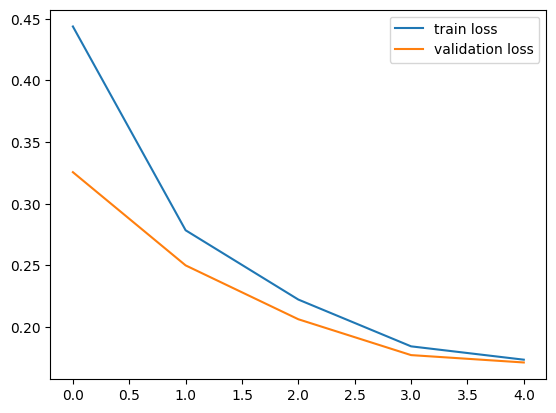

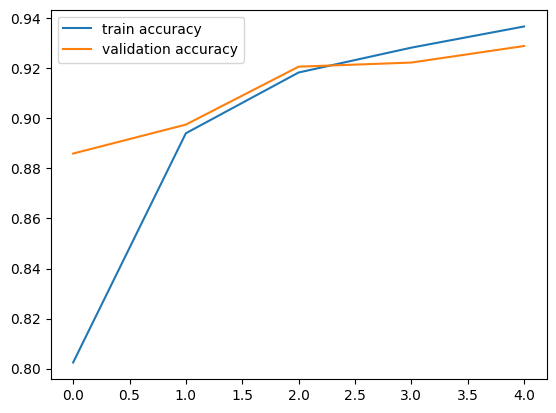

In [38]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/image1.jpg


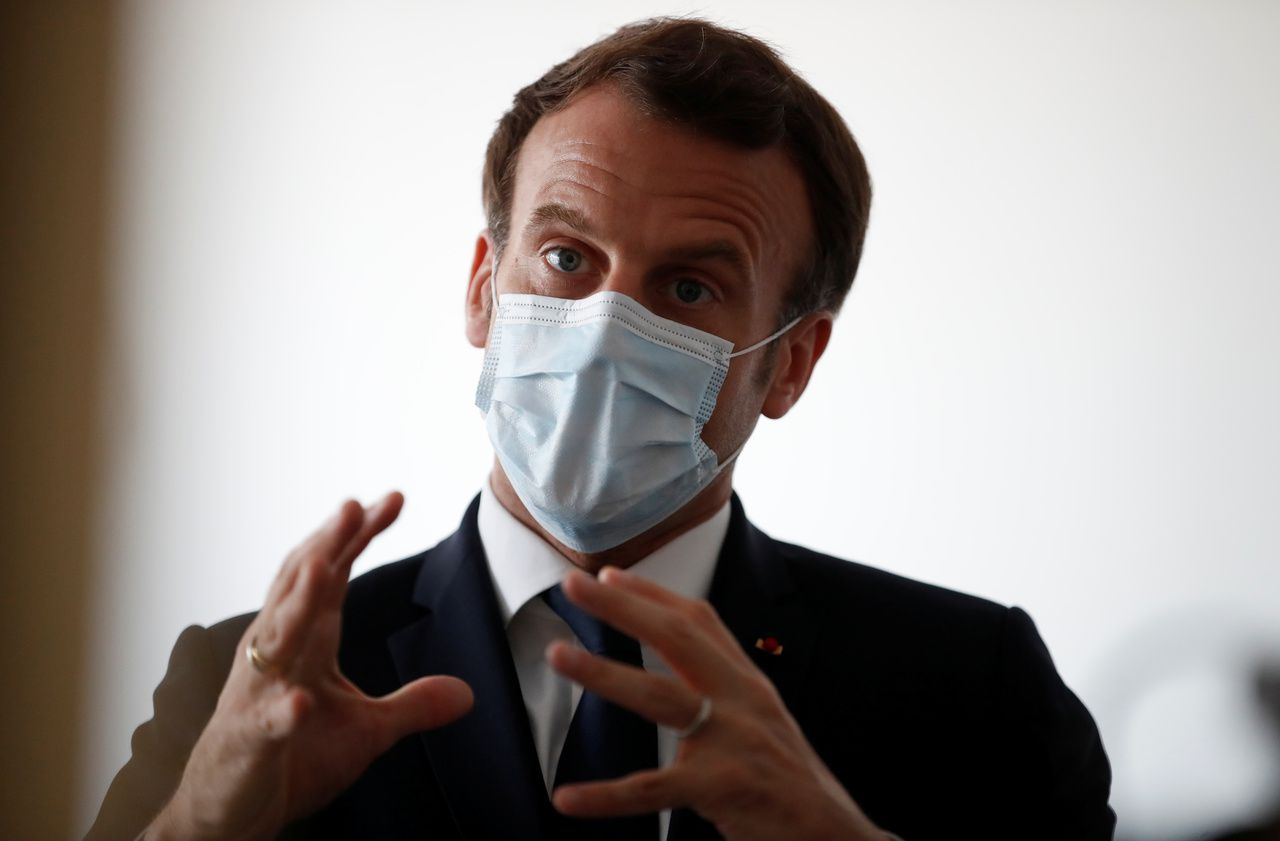

1/1 [==============================] - 0s 432ms/step
[[0.14835788 0.94136417]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')